In [5]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

(-2.7391278364515688,
 2.5801310701596343,
 -0.9477947579593763,
 1.0195904306706842)

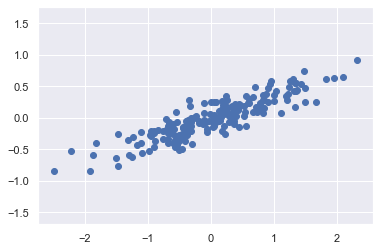

In [7]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2),rng.randn(2,200)).T
plt.scatter(X[:,0],X[:,1])
plt.axis('equal')

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
pca.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

In [12]:
pca.explained_variance_

array([0.7625315, 0.0184779])

In [13]:
pca.explained_variance_ratio_

array([0.97634101, 0.02365899])

In [14]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print('original shape: ',X.shape)
print('transformed shape: ',X_pca.shape)

original shape:  (200, 2)
transformed shape:  (200, 1)


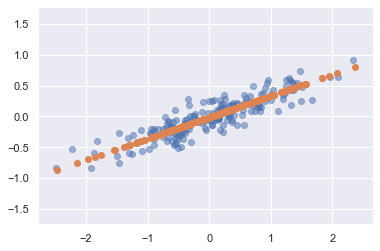

In [18]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:,0],X[:,1],alpha=0.5)
plt.scatter(X_new[:,0],X_new[:,1],alpha=1)
plt.axis('equal')
plt.show()

In [19]:
import pandas as pd

In [20]:
df = pd.read_csv('UK_food.csv')
df

,Loc,Cheese,Carcass meat,Other meat,Fish,Fats and oils,Sugars,Fresh potatoes,Fresh Veg,Other Veg,Processed potatoes,Processed Veg,Fresh fruit,Cereals,Beverages,Soft drinks,Alcoholic drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,NIreland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [21]:
df.set_index('Loc',inplace=True)
df

,Cheese,Carcass meat,Other meat,Fish,Fats and oils,Sugars,Fresh potatoes,Fresh Veg,Other Veg,Processed potatoes,Processed Veg,Fresh fruit,Cereals,Beverages,Soft drinks,Alcoholic drinks,Confectionery
Loc,,,,,,,,,,,,,,,,,
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
NIreland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [22]:
target_names = df.index.values
target_names

array(['England', 'Wales', 'Scotland', 'NIreland'], dtype=object)

In [23]:
train = df.values
train

array([[ 105,  245,  685,  147,  193,  156,  720,  253,  488,  198,  360,
        1102, 1472,   57, 1374,  375,   54],
       [ 103,  227,  803,  160,  235,  175,  874,  265,  570,  203,  365,
        1137, 1582,   73, 1256,  475,   64],
       [ 103,  242,  750,  122,  184,  147,  566,  171,  418,  220,  337,
         957, 1462,   53, 1572,  458,   62],
       [  66,  267,  586,   93,  209,  139, 1033,  143,  355,  187,  334,
         674, 1494,   47, 1506,  135,   41]], dtype=int64)

In [24]:
pca = PCA(n_components=4)
pcomp = pca.fit_transform(train)
pcomp1 = pcomp[:,0]
pcomp

array([[-1.44993152e+02, -2.53299944e+00,  1.05768945e+02,
         3.32151566e-14],
       [-2.40529148e+02, -2.24646925e+02, -5.64755547e+01,
         3.32151566e-14],
       [-9.18693390e+01,  2.86081786e+02, -4.44154950e+01,
         3.32151566e-14],
       [ 4.77391639e+02, -5.89018618e+01, -4.87789535e+00,
         3.32151566e-14]])

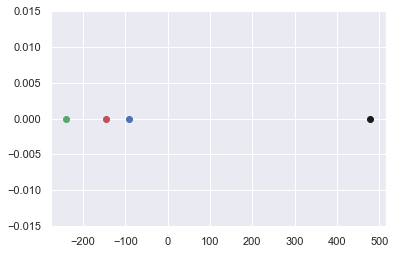

In [25]:
fig,ax = plt.subplots()
ax.scatter(pcomp1[0],0,c='r',label=target_names[0])
ax.scatter(pcomp1[1],0,c='g',label=target_names[1])
ax.scatter(pcomp1[2],0,c='b',label=target_names[2])
ax.scatter(pcomp1[3],0,c='k',label=target_names[3])

In [26]:
pca.explained_variance_ratio_

array([6.74443464e-01, 2.90524746e-01, 3.50317903e-02, 9.44200735e-33])

In [33]:
pca = PCA(n_components=1)
pca.fit(train)
train_pca = pca.transform(train)
pca.explained_variance_ratio_

array([0.67444346])

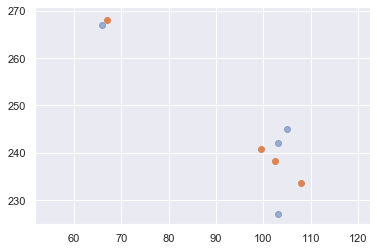

In [34]:
train_new = pca.inverse_transform(train_pca)
plt.scatter(train[:,0],train[:,1],alpha=0.5)
plt.scatter(train_new[:,0],train_new[:,1],alpha=1)
plt.axis('equal')
plt.show()